# Predictive Analysis and Coustmer Segmentation for an E-Commerce platform

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# Bussiness Understanding and Data Collection

In [2]:
csdata=pd.read_csv("data.csv",encoding='ISO-8859-1')

In [3]:
csdata

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
csdata.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
csdata.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [6]:
csdata.shape

(541909, 8)

# Data Cleaning and Preprocessing

In [7]:
csdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
csdata.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
data=csdata.dropna()

In [10]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
data.query('Quantity<0')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [12]:
data.query('UnitPrice<0')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [13]:
notuse_index=data[(data['Quantity']<0)| (data['UnitPrice']<0)].index
data=data.drop(notuse_index)

In [14]:
data.reset_index(drop=True)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
397919,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
397920,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
397921,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
397922,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [15]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'],format='%m/%d/%Y %H:%M')

In [16]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [17]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [19]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [20]:
data['CustomerID']=data['CustomerID'].astype('int64')

In [21]:
data['Total_Amount']=data['Quantity']*data['UnitPrice']
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [22]:
data.insert(loc=3,column="year",value=data.InvoiceDate.dt.year)

In [23]:
data.head()

,InvoiceNo,StockCode,Description,year,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,2010,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2010,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2010,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,2010,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


# EDA

In [24]:
cc=data.groupby(by=['CustomerID','Country'],as_index=False)['InvoiceNo'].count()
cc.head()

,CustomerID,Country,InvoiceNo
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17


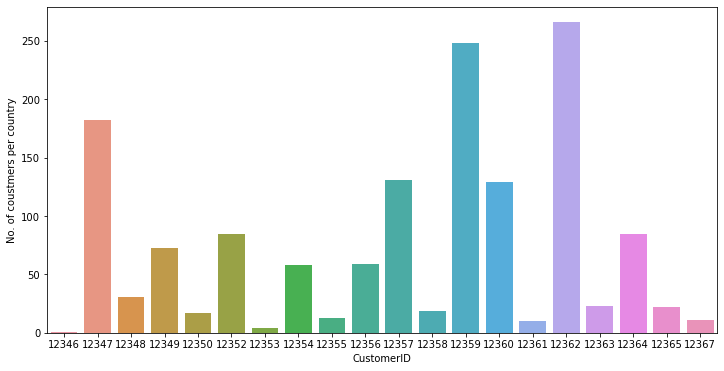

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(cc['CustomerID'].head(20),cc['InvoiceNo'].head(20))
plt.xlabel('CustomerID')
plt.ylabel('No. of coustmers per country')
plt.show()

In [26]:
purchase=data.groupby(by=['CustomerID','Country'],as_index=False)['Total_Amount'].sum()
purchase

,CustomerID,Country,Total_Amount
0,12346,United Kingdom,77183.60
1,12347,Iceland,4310.00
2,12348,Finland,1797.24
3,12349,Italy,1757.55
4,12350,Norway,334.40
...,...,...,...
4342,18280,United Kingdom,180.60
4343,18281,United Kingdom,80.82
4344,18282,United Kingdom,178.05
4345,18283,United Kingdom,2094.88


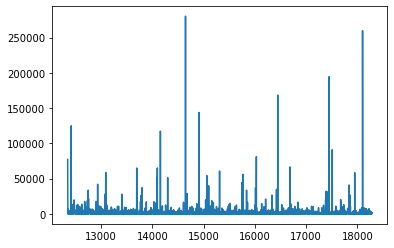

In [27]:
plt.plot(purchase['CustomerID'],purchase['Total_Amount'])
plt.xlabel=('CustomerID')
plt.ylabel=('Total_Amount')


In [28]:
data.corr()

,year,Quantity,UnitPrice,CustomerID,Total_Amount
year,1.000000,0.001595,-0.000191,-0.036352,0.000431
Quantity,0.001595,1.000000,-0.004561,-0.006411,0.908812
UnitPrice,-0.000191,-0.004561,1.000000,-0.010863,0.081646
CustomerID,-0.036352,-0.006411,-0.010863,1.000000,-0.004104
Total_Amount,0.000431,0.908812,0.081646,-0.004104,1.000000


In [29]:
amountpercountry=data.groupby(by=['Country'],as_index=False)['Total_Amount'].sum()
amountpercountry.head()

,Country,Total_Amount
0,Australia,138521.31
1,Austria,10198.68
2,Bahrain,548.40
3,Belgium,41196.34
4,Brazil,1143.60


TypeError: 'str' object is not callable

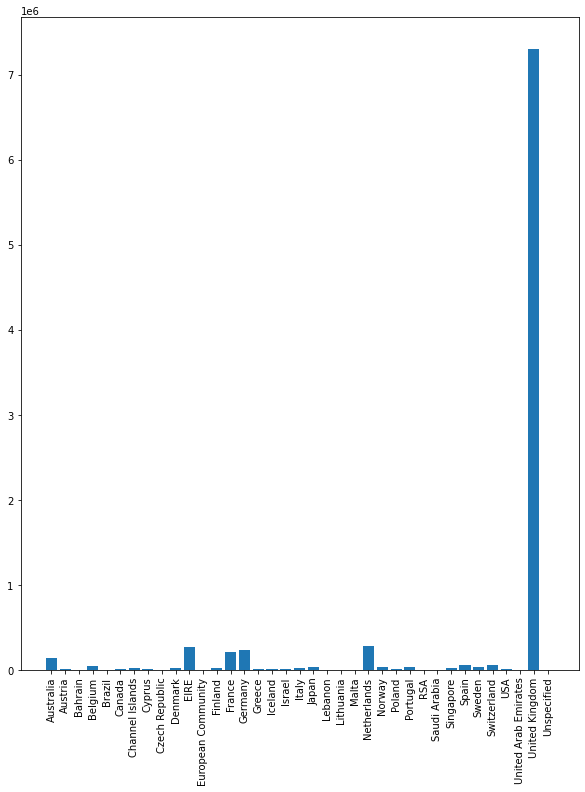

In [30]:
plt.figure(figsize=(10,12))
plt.bar(amountpercountry.Country,amountpercountry.Total_Amount)
plt.xticks(rotation='vertical')
plt.xlabel('Country',fontsize=13)
plt.ylabel('Total_Amount',fontsize=13)


TypeError: 'str' object is not callable

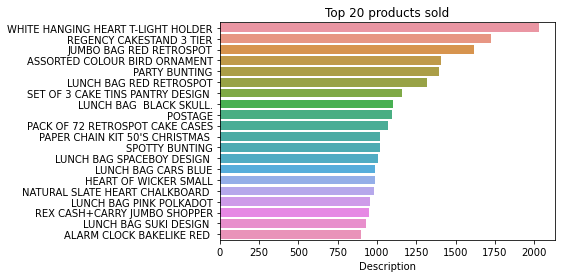

In [32]:
sns.barplot(x = data.Description.value_counts().head(20), y = data.Description.value_counts().head(20).index)
plt.title("Top 20 products sold")
plt.xlabel("Quantity")

<AxesSubplot:>

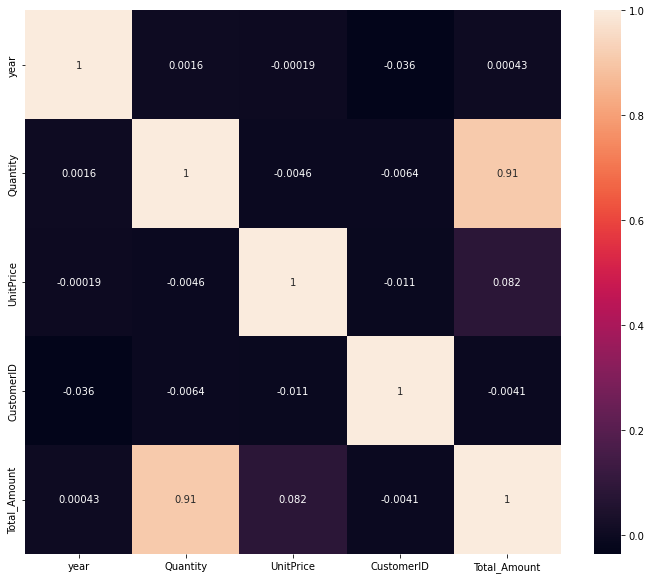

In [33]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True)

# Feature Engineering and Data transformation

In [34]:
data['Month']=data['InvoiceDate'].dt.month
data['Day']=data['InvoiceDate'].dt.day
data['Hour']=data['InvoiceDate'].dt.hour

In [35]:
data.head()

,InvoiceNo,StockCode,Description,year,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount,Month,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,1,8
1,536365,71053,WHITE METAL LANTERN,2010,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2010,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2010,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,2010,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,8


In [36]:
data.describe()

,year,Quantity,UnitPrice,CustomerID,Total_Amount,Month,Day,Hour
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,2010.934259,13.021823,3.116174,15294.315171,22.394749,7.612537,15.042181,12.728247
std,0.247829,180.420210,22.096788,1713.169877,309.055588,3.416527,8.653771,2.273535
min,2010.000000,1.000000,0.000000,12346.000000,0.000000,1.000000,1.000000,6.000000
25%,2011.000000,2.000000,1.250000,13969.000000,4.680000,5.000000,7.000000,11.000000
50%,2011.000000,6.000000,1.950000,15159.000000,11.800000,8.000000,15.000000,13.000000
75%,2011.000000,12.000000,3.750000,16795.000000,19.800000,11.000000,22.000000,14.000000
max,2011.000000,80995.000000,8142.750000,18287.000000,168469.600000,12.000000,31.000000,20.000000


In [37]:
data['Log_Annual_Spending']=np.log1p(data['Total_Amount'])

In [38]:
data.describe()

,year,Quantity,UnitPrice,CustomerID,Total_Amount,Month,Day,Hour,Log_Annual_Spending
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,2010.934259,13.021823,3.116174,15294.315171,22.394749,7.612537,15.042181,12.728247,2.454360
std,0.247829,180.420210,22.096788,1713.169877,309.055588,3.416527,8.653771,2.273535,1.020615
min,2010.000000,1.000000,0.000000,12346.000000,0.000000,1.000000,1.000000,6.000000,0.000000
25%,2011.000000,2.000000,1.250000,13969.000000,4.680000,5.000000,7.000000,11.000000,1.736951
50%,2011.000000,6.000000,1.950000,15159.000000,11.800000,8.000000,15.000000,13.000000,2.549445
75%,2011.000000,12.000000,3.750000,16795.000000,19.800000,11.000000,22.000000,14.000000,3.034953
max,2011.000000,80995.000000,8142.750000,18287.000000,168469.600000,12.000000,31.000000,20.000000,12.034517


(array([4.86080e+04, 1.30598e+05, 1.80728e+05, 2.90540e+04, 7.70800e+03,
        1.03100e+03, 1.87000e+02, 7.00000e+00, 1.00000e+00, 2.00000e+00]),
 array([ 0.        ,  1.20345165,  2.40690331,  3.61035496,  4.81380661,
         6.01725827,  7.22070992,  8.42416157,  9.62761323, 10.83106488,
        12.03451653]),
 <BarContainer object of 10 artists>)

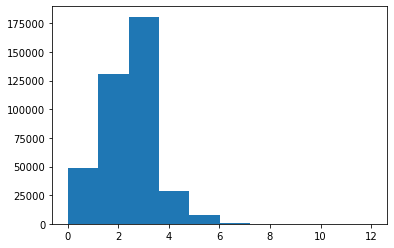

In [39]:
plt.hist(data['Log_Annual_Spending'])

In [40]:
a_spending = data.groupby('CustomerID')['Total_Amount'].sum()
a_spending

CustomerID
12346    77183.60
12347     4310.00
12348     1797.24
12349     1757.55
12350      334.40
           ...   
18280      180.60
18281       80.82
18282      178.05
18283     2094.88
18287     1837.28
Name: Total_Amount, Length: 4339, dtype: float64

(array([3.97921e+05, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([     0.  ,  16846.96,  33693.92,  50540.88,  67387.84,  84234.8 ,
        101081.76, 117928.72, 134775.68, 151622.64, 168469.6 ]),
 <BarContainer object of 10 artists>)

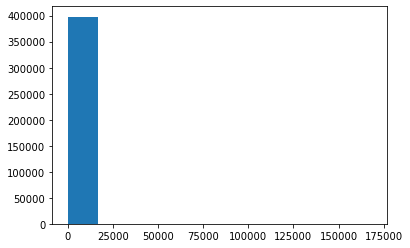

In [41]:
plt.hist(data['Total_Amount'])

In [42]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
data['Country_Encoded']=LE.fit_transform(data['Country'])

In [43]:
data.head()

,InvoiceNo,StockCode,Description,year,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount,Month,Day,Hour,Log_Annual_Spending,Country_Encoded
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,1,8,2.791165,35
1,536365,71053,WHITE METAL LANTERN,2010,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,8,3.060583,35
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2010,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,1,8,3.135494,35
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2010,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,8,3.060583,35
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,2010,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,8,3.060583,35


# Predictive Model Building

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [45]:
x = data[['Quantity', 'UnitPrice', 'Country_Encoded', 'year']]
y = data['Total_Amount']

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)
x_train

,Quantity,UnitPrice,Country_Encoded,year
166971,12,0.85,14,2011
83426,2,1.69,35,2011
441496,1,1.25,35,2011
61811,11,0.85,35,2011
508216,1,0.83,35,2011
...,...,...,...,...
432365,2,1.65,35,2011
434607,30,2.08,35,2011
482426,2,1.65,35,2011
403220,10,2.08,35,2011


In [47]:
x_test

,Quantity,UnitPrice,Country_Encoded,year
506494,12,0.79,35,2011
426582,1,1.25,35,2011
106895,1,1.95,35,2011
427943,10,0.85,35,2011
104477,24,0.29,35,2011
...,...,...,...,...
74388,1,4.25,35,2011
280198,12,1.95,35,2011
341753,24,0.42,35,2011
177480,10,0.85,35,2011


In [48]:
y_train

166971    10.20
83426      3.38
441496     1.25
61811      9.35
508216     0.83
          ...  
432365     3.30
434607    62.40
482426     3.30
403220    20.80
507284     2.08
Name: Total_Amount, Length: 318339, dtype: float64

In [49]:
y_test

506494     9.48
426582     1.25
106895     1.95
427943     8.50
104477     6.96
          ...  
74388      4.25
280198    23.40
341753    10.08
177480     8.50
97517      7.50
Name: Total_Amount, Length: 79585, dtype: float64

In [50]:
linear_R=LinearRegression()
linear_R.fit(x_train,y_train)
y_predicted_train_linear_R=linear_R.predict(x_train)
y_predicted_test_linear_R=linear_R.predict(x_test)

In [51]:
decision_tree=DecisionTreeRegressor(random_state=40)
decision_tree.fit(x_train,y_train)
y_predicted_train_decision_tree=decision_tree.predict(x_train)
y_predicted_test_decision_tree=decision_tree.predict(x_test)

In [52]:
RFR=RandomForestRegressor(random_state=40)
RFR.fit(x_train,y_train)
y_predicted_train_RFR=RFR.predict(x_train)
y_predicted_test_RFR=RFR.predict(x_test)


# Model Evaluation and Coustmer Segmentation

# Linear Regression

In [55]:
 from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


print("              Training Dataset           ")
print("Mean absolute error:     ",mean_absolute_error(y_train,y_predicted_train_linear_R))
print("Mean squared  error:     ",mean_squared_error(y_train,y_predicted_train_linear_R))
print("Root Mean squared error: ",np.sqrt(mean_squared_error(y_train,y_predicted_train_linear_R)))
print("R2 score:               ",r2_score(y_train,y_predicted_train_linear_R))

              Training Dataset           
Mean absolute error:      12.40358816008455
Mean squared  error:      19057.256869532437
Root Mean squared error:  138.0480237798877
R2 score:                0.8388062597477601


In [54]:
print("              Testing Dataset           ")
print("Mean absolute error:     ",mean_absolute_error(y_test,y_predicted_test_linear_R))
print("Mean squared  error:     ",mean_squared_error(y_test,y_predicted_test_linear_R))
print("Root Mean squared error: ",np.sqrt(mean_squared_error(y_test,y_predicted_test_linear_R)))
print("R2 score:               ",r2_score(y_test,y_predicted_test_linear_R))

              Testing Dataset           
Mean absolute error:      11.897239668259209
Mean squared  error:      3393.9202906277146
Root Mean squared error:  58.257362544383305
R2 score:                0.27343377352290776


# Decision Tree Regressor

In [56]:
print("              Training Dataset           ")
print("Mean absolute error:     ",mean_absolute_error(y_train,y_predicted_train_decision_tree))
print("Mean squared  error:     ",mean_squared_error(y_train,y_predicted_train_decision_tree))
print("Root Mean squared error: ",np.sqrt(mean_squared_error(y_train,y_predicted_train_decision_tree)))
print("R2 score:               ",r2_score(y_train,y_predicted_train_decision_tree))

              Training Dataset           
Mean absolute error:      2.37024866117291e-13
Mean squared  error:      2.7879042768832486e-25
Root Mean squared error:  5.280060867909809e-13
R2 score:                1.0


In [57]:
print("              Testing Dataset           ")
print("Mean absolute error:     ",mean_absolute_error(y_test,y_predicted_test_decision_tree))
print("Mean squared  error:     ",mean_squared_error(y_test,y_predicted_test_decision_tree))
print("Root Mean squared error: ",np.sqrt(mean_squared_error(y_test,y_predicted_test_decision_tree)))
print("R2 score:               ",r2_score(y_test,y_predicted_test_decision_tree))

              Testing Dataset           
Mean absolute error:      0.19151234529143576
Mean squared  error:      136.31553391342587
Root Mean squared error:  11.675424356888527
R2 score:                0.9708177403696863


# Random Forest Regressor

In [58]:
print("              Training Dataset           ")
print("Mean absolute error:     ",mean_absolute_error(y_train,y_predicted_train_RFR))
print("Mean squared  error:     ",mean_squared_error(y_train,y_predicted_train_RFR))
print("Root Mean squared error: ",np.sqrt(mean_squared_error(y_train,y_predicted_train_RFR)))
print("R2 score:               ",r2_score(y_train,y_predicted_train_RFR))

              Training Dataset           
Mean absolute error:      0.320370871900816
Mean squared  error:      7809.212587076718
Root Mean squared error:  88.36974927585071
R2 score:                0.9339466223311367


In [59]:
print("              Testing Dataset           ")
print("Mean absolute error:     ",mean_absolute_error(y_test,y_predicted_test_RFR))
print("Mean squared  error:     ",mean_squared_error(y_test,y_predicted_test_RFR))
print("Root Mean squared error: ",np.sqrt(mean_squared_error(y_test,y_predicted_test_RFR)))
print("R2 score:               ",r2_score(y_test,y_predicted_test_RFR))

              Testing Dataset           
Mean absolute error:      0.14949196029413167
Mean squared  error:      58.49173398495887
Root Mean squared error:  7.647988884991849
R2 score:                0.9874781624780901


# Accuracy of training data set

In [68]:
print(" Accuracy on training data set")
acc_linear_R_train=print(" Accuracy on linear Regression training data set            :  ",linear_R.score(x_train,y_train))
acc_decision_tree_train=print(" Accuracy on decision tree Regressor training data set      :  ",decision_tree.score(x_train,y_train))
acc_RFR_train=print(" Accuracy on Random forest Regressor training data set      :  ",RFR.score(x_train,y_train))

 Accuracy on training data set
 Accuracy on linear Regression training data set            :   0.8388062597477601
 Accuracy on decision tree Regressor training data set      :   1.0
 Accuracy on Random forest Regressor training data set      :   0.9339466223311367


# Accuracy on testing data set 

In [69]:
print(" Accuracy on testing data set")
acc_linear_R_test=print(" Accuracy on linear Regression test data set            :  ",linear_R.score(x_test,y_test))
acc_decision_tree_test=print(" Accuracy on decision tree Regressor test data set      :  ",decision_tree.score(x_test,y_test))
acc_RFR_test=print(" Accuracy on Random forest Regressor test data set      :  ",RFR.score(x_test,y_test))

 Accuracy on testing data set
 Accuracy on linear Regression test data set            :   0.27343377352290776
 Accuracy on decision tree Regressor test data set      :   0.9708177403696863
 Accuracy on Random forest Regressor test data set      :   0.9874781624780901


# Coustmer Segmentation

In [71]:
import seaborn as sns
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [74]:
new_column_name={'TotalSpending_AnnualSpending':'Annual_Spending'}
data.rename(columns=new_column_name,inplace=True)

In [82]:
most_recent_date=data['InvoiceDate'].max()

rfm_data=data.groupby('CustomerID').agg({
    'InvoiceDate':lambda x:(most_recent_date  - x.max()).days,
    'InvoiceNo': 'nunique',
    'Total_Amount': 'sum'
})
rfm_data.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'Total_Amount' :'MonetaryValue'
},   inplace=True)

In [83]:
rfm_data.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346,325,1,77183.60
12347,1,7,4310.00
12348,74,4,1797.24
12349,18,1,1757.55
12350,309,1,334.40


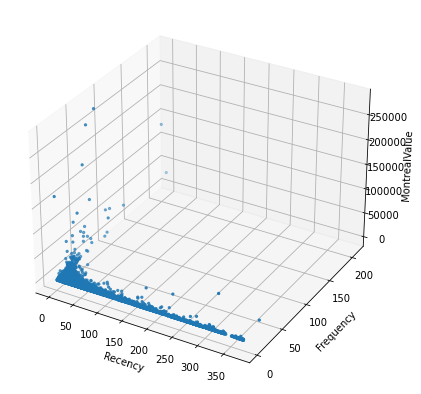

In [85]:
fig=plt.figure(figsize=(10,7))
ax=fig.add_subplot(111,projection='3d')
xs=rfm_data.Recency
ys=rfm_data.Frequency
zs=rfm_data.MonetaryValue
ax.scatter(xs,ys,zs,s=5)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('MontrealValue')
plt.show()

In [91]:
scaler=StandardScaler()
rfm_scaled=scaler.fit_transform(rfm_data)

In [92]:
inertia_values=[]
k_range=range(1,11)
for k in k_range:
    kmeans=KMeans(n_clusters=k,random_state=40)
    kmeans.fit(rfm_scaled)
    inertia_values.append(kmeans.inertia_)

TypeError: 'str' object is not callable

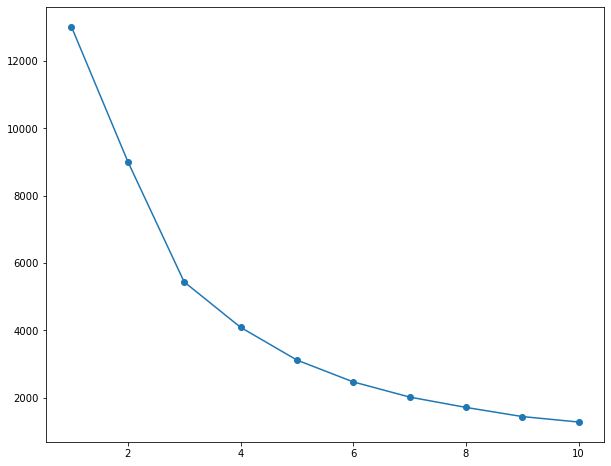

In [96]:
plt.figure(figsize=(10,8))
plt.plot(k_range,inertia_values,marker='o')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Within-Clusters Sum of Squares(Inertia)')
plt.title('Elbow Method for Optimal k in K-Means Clustering')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [98]:
# Apply K-Means clustring to create clusters based on RFM metrics
kmeams=KMeans(n_clusters=4,random_state=40)
rfm_data['KMeans_Cluster']=kmeans.fit_predict(rfm_scaled)

In [99]:
print("K-Means Clustering")
print(rfm_data['KMeans_Cluster'].value_counts())

K-Means Clustering
7    2163
0     747
1     667
3     603
6     127
5      18
4       6
9       4
8       2
2       2
Name: KMeans_Cluster, dtype: int64


TypeError: 'str' object is not callable

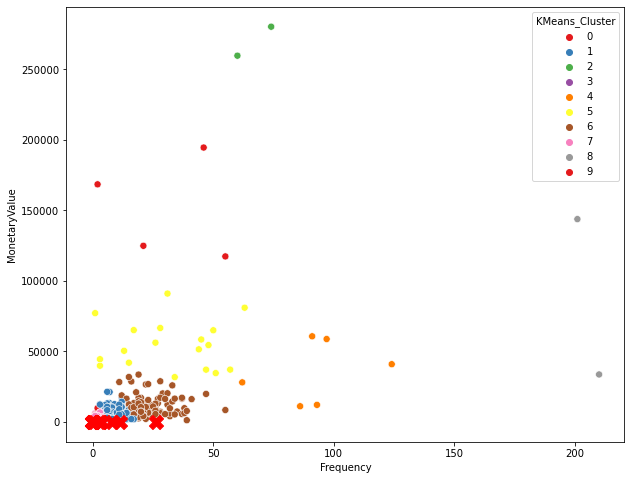

In [102]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=rfm_data,x='Frequency',y='MonetaryValue',hue='KMeans_Cluster',palette='Set1',s=50)
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],c='red',marker='X',s=200,label='Cluster Centers')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.title('RFM Customer Segmentation using K-Means Clustering (k=4)')
plt.legend()
plt.grid(True)
plt.show()

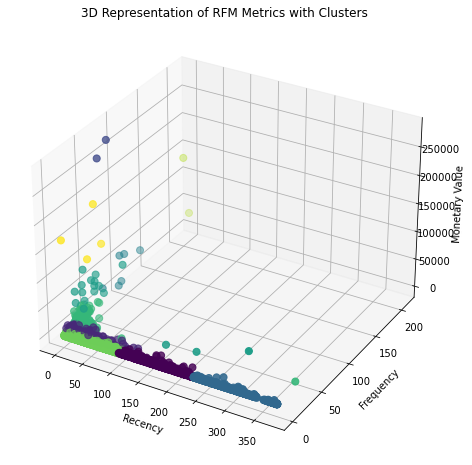

In [105]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')

ax.scatter(rfm_data['Recency'],rfm_data['Frequency'],rfm_data['MonetaryValue'],c=rfm_data['KMeans_Cluster'],cmap='viridis',s=50)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')
ax.set_title('3D Representation of RFM Metrics with Clusters')
plt.show()


In [106]:

# Apply Agglomerative Hierarchical Clustering
agg_clustering=AgglomerativeClustering(n_clusters=4)
rfm_data['Agg_Cluster']=agg_clustering.fit_predict(rfm_scaled)

In [107]:
print("\nAgglomerative Hierarchical Clustering")
print(rfm_data['Agg_Cluster'].value_counts())


Agglomerative Hierarchical Clustering
1    3200
2     949
3     175
0      15
Name: Agg_Cluster, dtype: int64


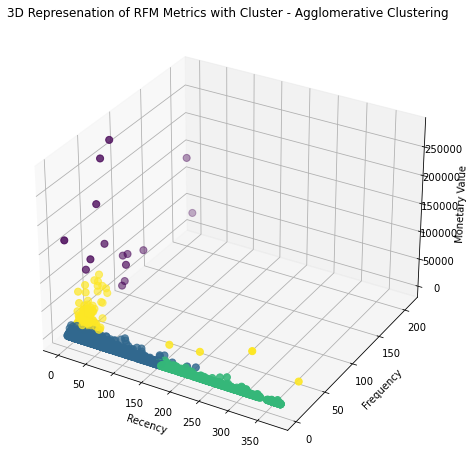

In [108]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(rfm_data['Recency'],rfm_data['Frequency'],rfm_data['MonetaryValue'],c=rfm_data['Agg_Cluster'],cmap='viridis',s=50)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')
ax.set_title('3D Represenation of RFM Metrics with Cluster - Agglomerative Clustering')
plt.show()

# Interpretation of Results and Communication

# High-Recency, Low-Frequency, Low-Monetary

Customers in this segment do not frequently make purchases, as seen by their high Recency value.

They also have low Frequency, which means that they don't buy things too often.

Additionally, their MonetaryValue is low, indicating that they consume less than other categories.

These individuals can be potential churned or inactive consumers in need of re-engagement tactics.

# High-Recency, High-Frequency, High-Monetary

This segment's customers have high Recency, which indicates that their purchases were not recent.
But , they have high Frequency, which indicates that they shop frequently.

Furthermore, their MonetaryValue is high, showing that they spend a lot more than other groups do.

This group is an accurate representation of the best clients, who are also the most lucrative for the company. 
Through individualised offers and loyalty programmes, they should be rewarded and kept around.

# Low-Recency, High-Frequency, High-Monetary

This segment's customers have low Recency, which means they have recently made purchases.

They often make purchases as evidenced by their high frequency.

Additionally, their MonetaryValue is high, indicating they have large expenditures.
  
This group is made up of devoted clients who are active buyers and a major source of income for the company.
They will -probably respond favourably to loyalty incentives and tailored recommendations.


# Low-Recency, Low-Frequency, Low-Monetary

This segment's customers have low Recency, which means they have recently made purchases.

They do, however, have low Frequency and low Monetary Value, indicating that they spend little money and make few purchases.

This group may be made up of clients who have recently made purchases but have not shown a high level of involvement or loyalty. 

For them to spend more money and make purchases more frequently, they might need specific incentives or offers.
